In [1]:
import pandas as pd
import joblib
data = joblib.load('frite_df')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans 
import warnings
warnings.simplefilter("ignore")

In [2]:
df = data.copy()

In [3]:
df.isna().sum()

Année                      27
croissance_annuelle        27
Population*1000            35
ODD Depenses Agricoles     95
Stabilité Politique        75
PIB/Habitant               61
Exportations_pdt          123
Importations_pdt           99
Exportations_Frites       133
Importations_Frites       103
dtype: int64

In [4]:
df = df.fillna(0)

In [5]:
df = df.drop("Année", axis = 1)

In [6]:
df = df[df["Importations_Frites"]!=0]

In [7]:
df

,croissance_annuelle,Population*1000,ODD Depenses Agricoles,Stabilité Politique,PIB/Habitant,Exportations_pdt,Importations_pdt,Exportations_Frites,Importations_Frites
Zone,,,,,,,,,
Afghanistan,-1.418885,34413.603,0.1610,-2.57,548.684768,2618.0,192155.0,0.0,10.0
Afrique du Sud,1.193731,55386.367,0.6774,-0.21,5588.907652,161028.0,52.0,0.0,3.0
Albanie,2.218752,2890.513,0.0988,0.35,3986.104855,660.0,14899.0,0.0,676.0
Algérie,3.700000,39728.025,0.0000,-1.09,4081.124105,26.0,152943.0,0.0,3.0
Allemagne,1.491932,81787.411,0.6400,0.70,41971.254921,1693080.0,472180.0,10.0,20682.0
...,...,...,...,...,...,...,...,...,...
États-Unis d'Amérique,3.075513,320878.310,0.3933,0.68,58334.244435,411666.0,400194.0,9.0,4209.0
Éthiopie,10.386216,100835.458,0.1993,-1.50,623.017918,127131.0,43.0,446.0,21.0
Îles Cook,5.749776,17.586,0.9068,0.00,17182.614750,0.0,0.0,0.0,23.0


In [8]:
joblib.dump(df, 'df_frites')

['df_frites']

In [9]:
pd.set_option('display.max_rows', 150)
pd.set_option("display.max_columns", 10)

In [10]:
df.head(3)

,croissance_annuelle,Population*1000,ODD Depenses Agricoles,Stabilité Politique,PIB/Habitant,Exportations_pdt,Importations_pdt,Exportations_Frites,Importations_Frites
Zone,,,,,,,,,
Afghanistan,-1.418885,34413.603,0.1610,-2.57,548.684768,2618.0,192155.0,0.0,10.0
Afrique du Sud,1.193731,55386.367,0.6774,-0.21,5588.907652,161028.0,52.0,0.0,3.0
Albanie,2.218752,2890.513,0.0988,0.35,3986.104855,660.0,14899.0,0.0,676.0


<AxesSubplot:>

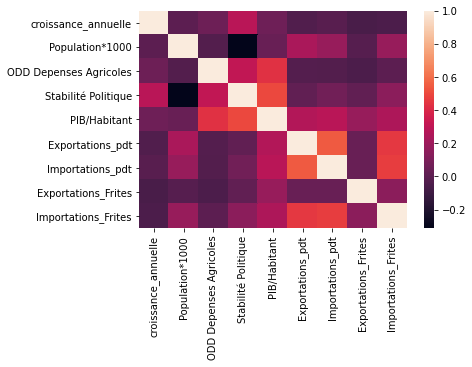

In [11]:
sns.heatmap(df.corr())

In [12]:
#df.head

In [13]:
#sc = MinMaxScaler()

In [14]:
sc = StandardScaler()

In [15]:
X_sc = sc.fit_transform(df)

In [16]:
joblib.dump(X_sc, "scaler_frites")

['scaler_frites']

In [17]:
X = pd.DataFrame(X_sc)
X.describe()

,0,1,2,3,4,5,6,7,8
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,6.661338e-18,-3.700743e-18,-7.327472e-17,-9.621933e-18,2.738550e-17,-5.366078e-17,-4.440892e-18,-1.591320e-17,-4.588922e-17
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-7.926764e+00,-5.288748e-01,-5.718822e-01,-3.196685e+00,-7.741961e-01,-2.340212e-01,-3.654994e-01,-2.105935e-01,-3.389854e-01
25%,-2.374877e-01,-4.865476e-01,-4.868193e-01,-5.087688e-01,-6.383061e-01,-2.340212e-01,-3.598377e-01,-2.105935e-01,-3.346291e-01
50%,6.433953e-02,-3.640097e-01,-2.419431e-01,7.719696e-02,-4.317800e-01,-2.326535e-01,-3.121219e-01,-2.074308e-01,-3.182929e-01
75%,3.227822e-01,-3.322241e-02,6.447247e-02,8.136861e-01,1.382112e-01,-1.985302e-01,-1.355498e-01,-1.497116e-01,-1.883657e-01
max,3.698033e+00,6.057231e+00,8.802001e+00,1.641564e+00,4.246248e+00,8.215924e+00,9.131885e+00,1.015673e+01,8.918626e+00


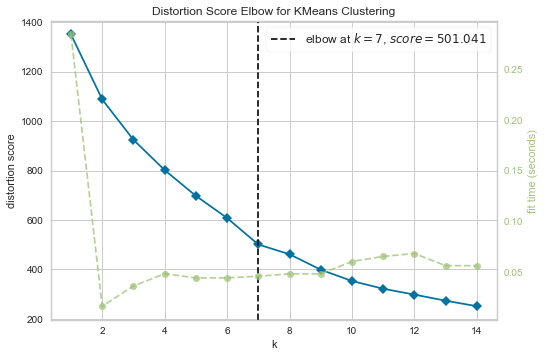

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [19]:
L = []
for i in np.arange(1, 15):
    model = KMeans(n_clusters = i)
    model.fit(X)
    L.append(model.inertia_)
L

[1350.0000000000007,
 1087.196829346719,
 940.0442494592172,
 796.6492844169367,
 704.3437868791511,
 597.8643658638443,
 536.1748992549753,
 450.14804886726785,
 406.35083576081894,
 338.6765554441107,
 325.4605454671154,
 295.49056974067474,
 267.2016285425126,
 251.24596910756713]

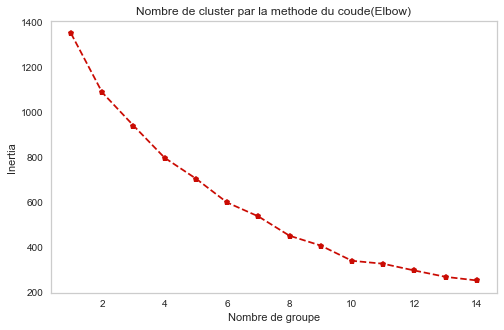

In [20]:
plt.figure(figsize =(8, 5))
plt.plot(np.arange(1, 15), L, 'rp--')
plt.xlabel('Nombre de groupe')
plt.ylabel('Inertia')
plt.title('Nombre de cluster par la methode du coude(Elbow)')
plt.grid()
plt.show()

In [21]:
modele = KMeans(n_clusters = 7, random_state = 42)
modele.fit(X)

KMeans(n_clusters=7, random_state=42)

In [22]:
y_pred = modele.predict(X)

In [23]:
y_pred

array([6, 6, 6, 6, 1, 0, 6, 6, 6, 0, 0, 6, 0, 2, 0, 1, 6, 0, 6, 6, 0, 2,
       0, 6, 6, 0, 6, 0, 0, 6, 6, 6, 0, 0, 0, 6, 5, 6, 0, 0, 0, 6, 0, 0,
       1, 2, 6, 6, 6, 0, 6, 6, 6, 6, 6, 0, 2, 0, 0, 6, 1, 6, 0, 6, 6, 6,
       0, 0, 0, 6, 4, 0, 3, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 2, 0, 6, 0, 6,
       6, 2, 0, 0, 0, 6, 0, 6, 2, 0, 6, 6, 6, 0, 0, 6, 0, 0, 0, 6, 6, 6,
       0, 6, 6, 6, 0, 0, 0, 6, 6, 0, 3, 5, 0, 6, 3, 6, 0, 6, 0, 6, 6, 0,
       0, 6, 6, 0, 6, 0, 6, 6, 4, 0, 6, 0, 6, 2, 6, 0, 6, 0])

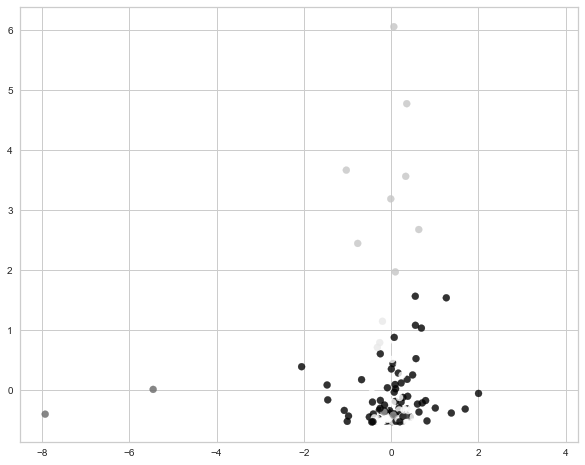

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(X_sc[:, 0], X_sc[:, 1], c= y_pred, alpha = 0.8)

In [25]:
modele.inertia_

501.0412173793794

In [26]:
modele.cluster_centers_

array([[ 1.37520248e-01, -3.20706564e-01,  1.44259115e-01,
         7.90570017e-01,  3.68688526e-01, -1.74166630e-01,
        -6.08236570e-02, -1.38115034e-01, -1.35989732e-03],
       [-2.19987975e-01,  5.90111233e-01, -1.52669806e-01,
         4.75008613e-01,  1.43625432e+00,  4.86250573e+00,
         4.20107419e+00, -2.55756868e-02,  4.22480236e+00],
       [-3.85088104e-02,  3.54375323e+00, -1.47986465e-01,
        -1.04097632e+00, -9.08277848e-02,  3.74897001e-01,
         4.49809610e-01, -1.48130245e-01,  2.03131122e-01],
       [ 4.78045988e-02, -4.30197171e-01,  5.53901872e+00,
         1.46236996e+00,  3.17789738e+00, -2.20300382e-01,
        -2.73263409e-01, -1.24146450e-01, -2.28843201e-01],
       [-6.68976314e+00, -1.91284369e-01, -5.71882241e-01,
        -2.62684709e+00, -6.68930786e-01, -2.29456281e-01,
        -3.55615286e-01,  1.04341633e+00, -3.33540047e-01],
       [ 1.45592785e-01, -4.14934132e-01, -1.97581065e-01,
         9.48081927e-01,  1.27955331e+00,  1.376922

In [27]:
centres= pd.DataFrame(modele.cluster_centers_, columns=df.columns)

In [28]:
centres

,croissance_annuelle,Population*1000,ODD Depenses Agricoles,Stabilité Politique,PIB/Habitant,Exportations_pdt,Importations_pdt,Exportations_Frites,Importations_Frites
0,0.137520,-0.320707,0.144259,0.790570,0.368689,-0.174167,-0.060824,-0.138115,-0.001360
1,-0.219988,0.590111,-0.152670,0.475009,1.436254,4.862506,4.201074,-0.025576,4.224802
2,-0.038509,3.543753,-0.147986,-1.040976,-0.090828,0.374897,0.449810,-0.148130,0.203131
3,0.047805,-0.430197,5.539019,1.462370,3.177897,-0.220300,-0.273263,-0.124146,-0.228843
4,-6.689763,-0.191284,-0.571882,-2.626847,-0.668931,-0.229456,-0.355615,1.043416,-0.333540
5,0.145593,-0.414934,-0.197581,0.948082,1.279553,0.137692,0.174387,7.773638,1.149786
6,0.082841,-0.126268,-0.309001,-0.592056,-0.533727,-0.157109,-0.219311,-0.108274,-0.273079


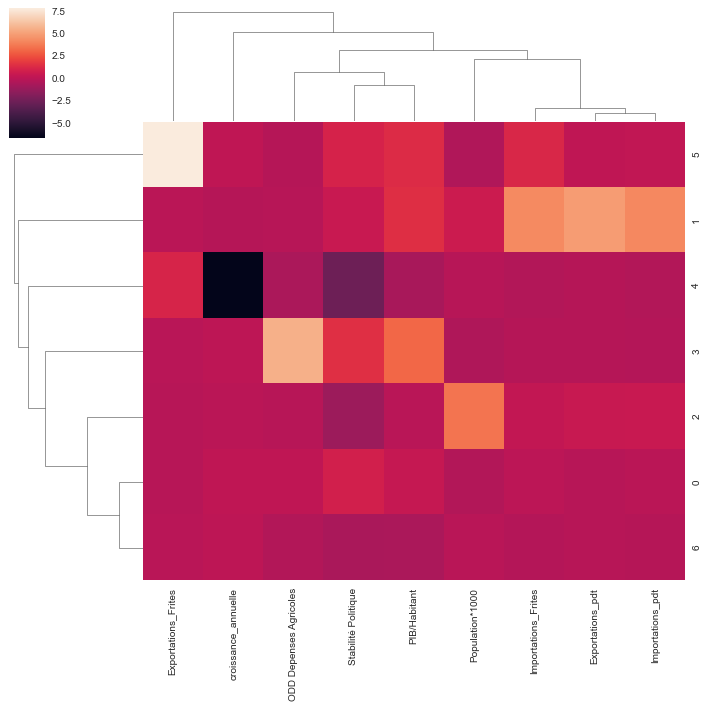

In [29]:
sns.clustermap(centres)

In [35]:
def scan_cluster(X, y_pred):
    df = pd.DataFrame(dict(x = X_sc[:, 0], y = X_sc[:, 1], label = y_pred))
    colors = {-1 : "blue", 0: "g", 1: 'y', 2: 'purple', 3: 'orange', 4: 'grey', 5: 'pink', 6: "r"}
    fig, ax = plt.subplots(figsize = (8, 6))
    grouped = df.groupby("label")
    for key, group in grouped:
        group.plot(ax = ax, kind = "scatter", x = 'x', y = 'y', label = key, color = colors[key])
    plt.show()

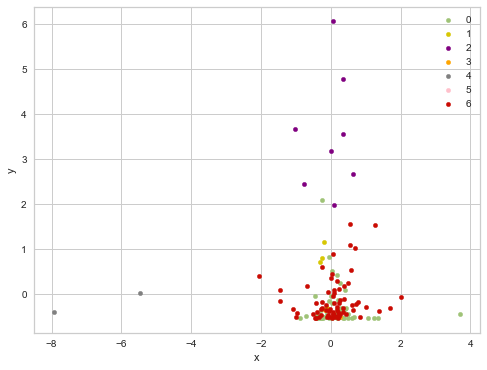

In [36]:
scan_cluster(X, y_pred)